 ## Kinematics
 
The Programmable Universal Manipulation Arm (PUMA) of Figure \ref{fig:rob3} is a common 6-degree-of-freedom industrial robotic arm.

<IPython.core.display.Javascript object>


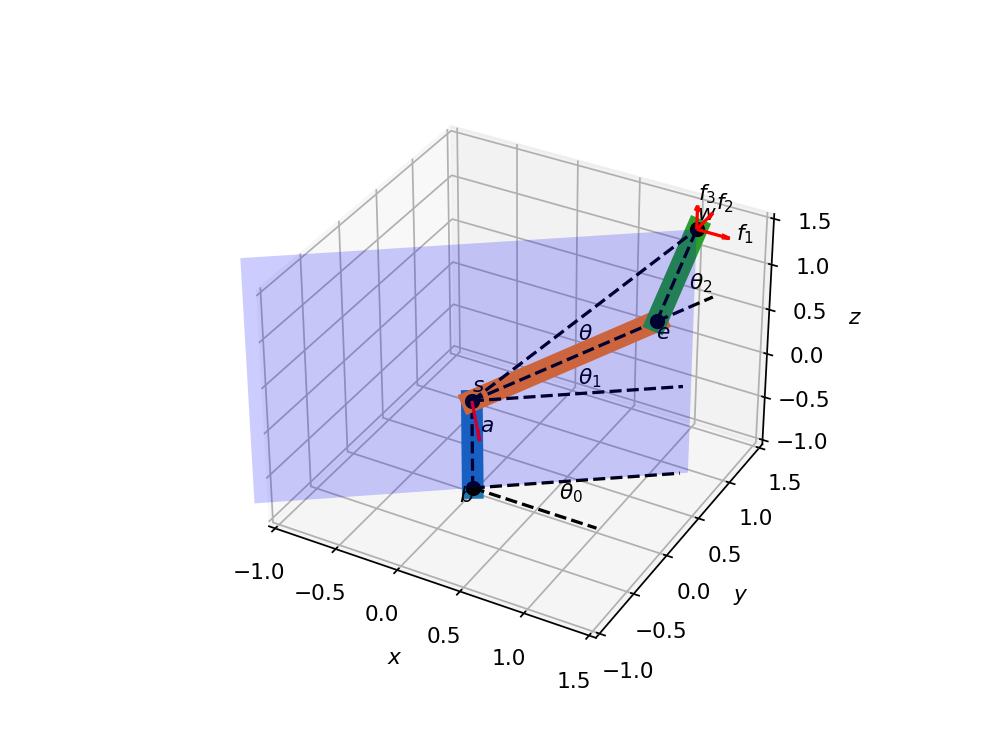

In [2]:
# 6R PUMA
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

theta0 = np.pi/5      # angles and link lengths
ell1 = 1.5
ell2 = 1
theta1 = np.pi/6
theta2 = np.pi/4

b = np.array([0,0,-1])   # base
s = np.array([0,0,0])    # shoulder

ax.plot3D([b[0],s[0]],[b[1],s[1]],[b[2],s[2]],linewidth=10)   # link 0, b to s
ax.plot3D([b[0],s[0]],[b[1],s[1]],[b[2],s[2]],'ko--')

e = np.array([ell1*np.cos(theta0)*np.cos(theta1), ell1*np.sin(theta0)*np.cos(theta1), 
              ell1*np.sin(theta1)])   # elbow

ax.plot3D([s[0],e[0]],[s[1],e[1]],[s[2],e[2]],linewidth=10)   # link 1, s to e
ax.plot3D([s[0],e[0]],[s[1],e[1]],[s[2],e[2]],'ko--')

w = e + np.array([ell2*np.cos(theta0)*np.cos(theta1+theta2), ell2*np.sin(theta0)*np.cos(theta1+theta2), 
                  ell2*np.sin(theta1+theta2)])   # wrist

ax.plot3D([e[0],w[0]],[e[1],w[1]],[e[2],w[2]],linewidth=10)   # link 2, e to w
ax.plot3D([e[0],w[0]],[e[1],w[1]],[e[2],w[2]],'ko--')

ax.plot3D([s[0],w[0]],[s[1],w[1]],[s[2],w[2]], 'k--')   # finish theta triangle

# paste a labeled frame at end
f1 = np.array([1,0,0])/2
f2 = np.array([0,1,0])/2
f3 = np.array([0,0,1])/2
F2 = ax.quiver([w[0],w[0],w[0]],[w[1],w[1],w[1]],[w[2],w[2],w[2]],
               [f1[0], f2[0], f3[0]],[f1[1], f2[1], f3[1]], [f1[2], f2[2], f3[2]], 
               length=0.5, colors='r', arrow_length_ratio=.25)
tf1 = 0.6*f1 + w
ax.text3D(tf1[0], tf1[1], tf1[2], '$f_1$')
tf2 = 0.6*f2 + w
ax.text3D(tf2[0], tf2[1], tf2[2], '$f_2$')
tf3 = 0.6*f3 + w
ax.text3D(tf3[0], tf3[1], tf3[2], '$f_3$')

ax.text3D(0, -.2, -1, '$b$')
ax.text3D(0, 0, 0.1, '$s$')
ax.text3D(e[0], e[1], e[2]-.2, '$e$')
ax.text3D(w[0], w[1], w[2]+.1, '$w$')

# add angle labels and helpful liness
ax.plot3D([b[0],b[0]+1], [b[1],b[1]],[b[2],b[2]],'k--')
ax.plot3D([b[0],ell1*np.cos(theta0)], [b[1],ell1*np.sin(theta0)],[b[2],b[2]],'k--')
ax.text3D(ell1*np.cos(theta0)/2, ell1*np.sin(theta0)/5, b[2],'$\\theta_0$')

ax.plot3D([s[0],ell1*np.cos(theta0)], [s[1],ell1*np.sin(theta0)],[s[2],s[2]],'k--')
ax.text3D(ell1*np.cos(theta0)/2, ell1*np.sin(theta0)/2, s[2] + 0.1,'$\\theta_1$')
ax.text3D(ell1*np.cos(theta0)/2, ell1*np.sin(theta0)/2, s[2] + 0.6,'$\\theta$')

Le = 1.3*e  # Long e
ax.plot3D([e[0],Le[0]], [e[1],Le[1]],[e[2],Le[2]],'k--')
ax.text3D(Le[0]*.9, Le[1]*.9, Le[2]*.9 + 0.2,'$\\theta_2$')

# paint the sew plane
x = [-w[0], w[0], w[0], -w[0]]  
y = [-w[1], w[1], w[1], -w[1]]  
z = [-1, -1, w[2], w[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'b', alpha = 0.2))

a = np.array([np.sin(theta0), -np.cos(theta0), 0])/2
arr = ax.quiver(0,0,0,a[0], a[1], a[2], length=1, colors='r', arrow_length_ratio=.25)
ax.text3D(a[0], a[1], a[2]+0.1, '$a$')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_xlim(-1,1.5)
ax.set_ylim(-1,1.5)
ax.set_zlim(-1,1.5)
plt.grid('on')
plt.show()

\begin{myfig}\label{fig:rob3} A 6 degree-of-freedom PUMA robot. It swings by $\theta_0$ at its base, $b$, by $\theta_1$ at its shoulder, $s$, by $\theta_2$ at its elbow, $e$, and by an additional 3 degrees-of-freedom at it's wrist, $w$. The orange link has length $\ell_1$ and the green link has length $\ell_2$. \end{myfig}

In terms of the stated angles and known link lengths, the positions of the marked joints in Figure \ref{fig:rob3} are

\begin{equation}\label{eq:pumadef}
s = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \hskip 0.25in
e = \begin{bmatrix} \ell_1\cos(\theta_0)\cos(\theta_1)  \\ \ell_1\sin(\theta_0)\cos(\theta_1) \\ \ell_1\sin(\theta_1) \end{bmatrix}, \hskip 0.25in
w =  \begin{bmatrix} \ell_1\cos(\theta_0)\cos(\theta_1) + \ell_2\cos(\theta_0)\cos(\theta_1+\theta_2) \\ \ell_1\sin(\theta_0)\cos(\theta_1) + \ell_2\sin(\theta_0)\cos(\theta_1+\theta_2)\\ \ell_1\sin(\theta_1) + \ell_2\sin(\theta_1+\theta_2) \end{bmatrix}
\end{equation}

The **inverse problem** of moving from a known configuration, 
$\{\ov\theta_0,\ov\theta_1,\ov\theta_2,\ov f_1,\ov f_2, \ov f_3\}$, to a target configuration, $\{w,f_1, f_2, f_3\}$
is solved in three steps.

In the **first** step we find the base angle $\theta_0$ by taking the ratio of the first two components in $w$. In particular

\begin{equation}\label{eq:w3a}
  \frac{w_1}{w_0} = \tan(\theta_0)
\end{equation}

We then rotate the base by $\delta_0\equiv \theta_0-\ov\theta_0$ about the $z$-axis. This places the wrist in the proper plane and its frame at

\begin{equation}\label{eq:wfra2}
  (f_x,f_y, f_z) \equiv (K(e_z,\delta_0)\ov f_1, K(e_z,\delta_0)\ov f_2, K(e_z,\delta_0)\ov f_3)
\end{equation}

In the **second** step we recognize that links 1 and 2 lie in a plane and that rotation *in* this plane corresponds to rotation about the axis

\begin{equation}\label{eq:InK1}
  a = \begin{bmatrix} \sin(\theta_0) \\ -\cos(\theta_0) \\ 0 \end{bmatrix}
\end{equation}

perpendicular to this plane. We may determine the intermediate angle $\theta$ as in our inverse solution of the planar robot arm,

\begin{equation}\label{eq:ct}
  \cos(\theta) = \frac{\ell_3^2+\ell_1^2-\ell_2^2}{2\ell_1\ell_3}
\end{equation}

where $\ell_3=\|w\|$ is the distance from shoulder to wrist. With $\theta$ in hand it is a simple matter to deduce the shoulder and elbow angles, $\theta_1$ and $\theta_2$, from Figure \ref{fig:rob3} via the Law of Cosines. We then rotate the
shoulder by $\theta_1-\ov\theta_1$ and the elbow by $\theta_2-\ov\theta_2$. This action rotates the step-1 wrist frame,
by $\delta\equiv (\theta_1+\theta_2)-(\ov\theta_1+\ov\theta_2)$ about the axis, $a$ of (\ref{eq:InK1}).
As such, the wrist frame becomes $(K(a,\delta)K(e_z,\delta_0)\ov f_1, K(a,\delta)K(e_z,\delta_0)\ov f_2, K(a,\delta)K(e_z,\delta_0)\ov f_3)$.

For the **third** and final step we  use the composite rotation, $\cK$, of (\ref{eq:EATot}) to map the step-2 wrist frame to the target wrist frame, $(f_1,f_2,f_3)$.

\begin{exercise}\label{ex:rob3} Implement these three steps, in code, in moving the PUMA from $\\{0,0,0,e_x,e_y,e_z\\}$ to 
$\\{w,-e_x,e_y,-e_z\\}$ where

\begin{equation}\label{eq:tw}
   w = \begin{bmatrix} 1/2 \\ 1/2 \\ 2 \end{bmatrix}
\end{equation}

assuming $\ell_1 = 1.5$ and $\ell_2 = 1$.

(a) Find $\theta_0$ and apply the rotation matrix $K(e_z,\delta_0)$.

(b) Find $\theta, \theta_1, \theta_2$, and apply the rotation matrix $K(a,\delta)$.

(c) Find and apply the composite rotation, $\cK$, using the last code cell in the previous section, that brings the wrist frame to $(-e_x,e_y,-e_z)$.

(d) Confirm your calculations against the animation below.

\end{exercise}


<IPython.core.display.Javascript object>


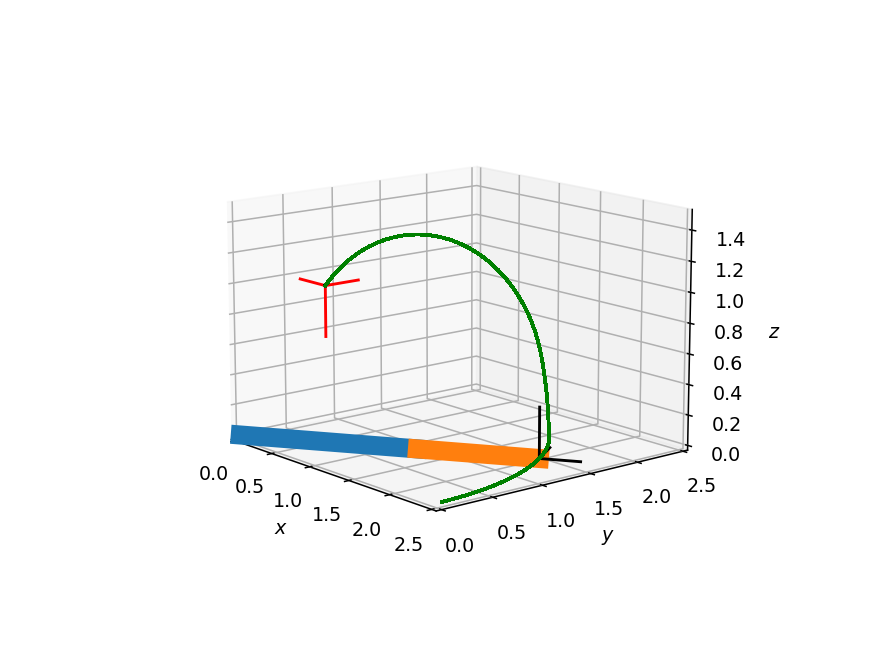

In [1]:
# 3D Inverse Kinematics Animation
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def Rot(a,theta):
    aO = np.outer(a, a)
    Xa = np.array([[0, -a[2], a[1]], [a[2], 0, -a[0]], [-a[1], a[0], 0]])
    K = aO + np.sin(theta)*Xa + np.cos(theta)*(np.eye(3)-aO)
    return K

def update_links(n, edat, wdat, Fdat, link1, link2, link3, lin4, link5):
    link1.set_data([0, edat[0,n]], [0, edat[1,n]])
    link1.set_3d_properties([0, edat[2,n]])
    link2.set_data([edat[0,n], wdat[0,n]], [edat[1,n], wdat[1,n]])
    link2.set_3d_properties([edat[2,n], wdat[2,n]])
    Fdat = Fdat/3 # shorten them for better looks
    link3.set_data([wdat[0,n], wdat[0,n]+Fdat[0,0,n]], [wdat[1,n], wdat[1,n]+Fdat[1,0,n]])
    link3.set_3d_properties([wdat[2,n], wdat[2,n]+Fdat[2,0,n]])
    link4.set_data([wdat[0,n], wdat[0,n]+Fdat[0,1,n]], [wdat[1,n], wdat[1,n]+Fdat[1,1,n]])
    link4.set_3d_properties([wdat[2,n], wdat[2,n]+Fdat[2,1,n]])
    link5.set_data([wdat[0,n], wdat[0,n]+Fdat[0,2,n]], [wdat[1,n], wdat[1,n]+Fdat[1,2,n]])
    link5.set_3d_properties([wdat[2,n], wdat[2,n]+Fdat[2,2,n]])
    ax.plot(wdat[0,:n], wdat[1,:n], wdat[2,:n], 'g')

fig1 = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work  
ax.view_init(elev=13, azim=-40) 

# base configuration

ell1 = 1.5
ell2 = 1
sb = np.array([0,0,0])
eb = np.array([ell1,0,0])
fab = np.array([ell2,0,0])  # fore-arm
wb = eb + fab

Fb = np.array([[1,0,0], [0,1,0], [0,0,1]])   

wbq = np.outer(wb, np.array([1,1,1]))  # splay values for quiver

link1, = ax.plot([0, eb[0]], [0, eb[1]], [0, eb[2]], linewidth=10)
link2, = ax.plot([eb[0], wb[0]], [eb[1], wb[1]], [eb[2], wb[2]], linewidth=10)

link3, = ax.plot([wb[0], wb[0]+Fb[0,0]/3], [wb[1], wb[1]+Fb[1,0]/3], [wb[2], wb[2]+Fb[2,0]/3], 'k')
link4, = ax.plot([wb[0], wb[0]+Fb[0,1]/3], [wb[1], wb[1]+Fb[1,1]/3], [wb[2], wb[2]+Fb[2,1]/3], 'k')
link5, = ax.plot([wb[0], wb[0]+Fb[0,2]/3], [wb[1], wb[1]+Fb[1,2]/3], [wb[2], wb[2]+Fb[2,2]/3], 'k')

ax.set_xlim(0,2.5)
ax.set_ylim(0,2.5)
ax.set_zlim(0,1.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

# target configuration

w = np.array([1/2,1/2,1])
ell3 = np.linalg.norm(w)
Ft = np.array([[-1,0,0], [0,1,0], [0,0,-1]])

ax.plot([w[0], w[0]+Ft[0,0]/3], [w[1], w[1]+Ft[1,0]/3], [w[2], w[2]+Ft[2,0]/3], 'r')
ax.plot([w[0], w[0]+Ft[0,1]/3], [w[1], w[1]+Ft[1,1]/3], [w[2], w[2]+Ft[2,1]/3], 'r')
ax.plot([w[0], w[0]+Ft[0,2]/3], [w[1], w[1]+Ft[1,2]/3], [w[2], w[2]+Ft[2,2]/3], 'r')

FpR = 40   # frames per Rotation
edat = np.zeros((3,5*FpR))   # elbow position
wdat = np.zeros((3,5*FpR))   # wrist position
Fdat = np.zeros((3,3,5*FpR))   # wrist orientation

# step 1 (rotate at base)

theta0 = np.arctan(w[1]/w[0])
ez = np.array([0,0,1])
e1 = eb
fa1 = fab
w1 = wb
F1 = Fb
K1 = Rot(ez, theta0/FpR)

for n in range(FpR):
    e1 = K1@e1
    fa1 = K1@fa1
    edat[:,n] = e1
    w1 = K1@w1
    wdat[:,n] = w1
    F1 = K1@F1
    Fdat[:,:,n] = F1
    
# step 2  (rotate at shoulder and elbow)

a = np.array([np.sin(theta0), -np.cos(theta0), 0])
theta = np.arccos((ell3**2+ell1**2-ell2**2)/(2*ell3*ell1))
w_ang = np.pi/2 - np.arccos(np.dot(w,ez)/ell3)
theta1 = w_ang - theta

alpha = np.arccos((ell2**2+ell1**2-ell3**2)/(2*ell2*ell1))
theta2 = np.pi - alpha

K2 = Rot(a, theta1/FpR)   # shoulder
for n in range(FpR, 2*FpR):
    e1 = K2@e1
    edat[:,n] = e1
    fa1 = K2@fa1
    w1 = K2@w1
    wdat[:,n] = w1
    F1 = K2@F1
    Fdat[:,:,n] = F1

K3 = Rot(a, theta2/FpR)  # elbow

for n in range(2*FpR, 3*FpR):
    edat[:,n] = e1
    fa1 = K3@fa1
    wdat[:,n] = e1 + fa1
    F1 = K3@F1
    Fdat[:,:,n] = F1
    
# step 3, final wrist twist

fN = np.cross(F1[:,2],Ft[:,2])
fN = fN / np.linalg.norm(fN)

ori1 = np.linalg.det(np.vstack((F1[:,0], fN, F1[:,2])))   # check orientation of this triple
phi = np.sign(ori1)*np.arccos(np.dot(F1[:,0], fN))  
K1 = Rot(F1[:,2], phi)

ori2 = np.linalg.det(np.vstack((F1[:,2], Ft[:,2], fN)))
theta = np.sign(ori2)*np.arccos(np.dot(F1[:,2], Ft[:,2]))
K2 = Rot(fN, theta) 

ori3 = np.linalg.det(np.vstack((fN, Ft[:,0], Ft[:,2])))
psi = np.sign(ori3)*np.arccos(np.dot(fN, Ft[:,0]))
K3 = Rot(Ft[:,2], psi)

K = K3@K2@K1
F4 = K@F1

for n in range(FpR):
    edat[:,n+3*FpR] = e1
    wdat[:,n+3*FpR] = e1 + fa1
    t = (1+n)/FpR
    Fdat[:,:,n+3*FpR] = (1-t)*F1 + t*F4
    
# freeze for last FpR frames

for n in range(4*FpR, 5*FpR):
    edat[:,n] = e1
    wdat[:,n] = e1 + fa1
    Fdat[:,:,n] = F4

ani = animation.FuncAnimation(fig1, update_links, 5*FpR, fargs=(edat, wdat, Fdat, link1, link2, link3, link4, link5), 
                              interval=10, blit=True)

\begin{myfig}\label{fig:robo3ani} Animation of the solution of the 3D inverse kinematics problem. The straight-arm base configuration reaches the red target orientation along the green path via the three steps outlined above. \end{myfig}